In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
datos = pd.read_csv("FOTOSINTESIS.csv", delimiter=";")

In [3]:
datos.head()

,Ano,Cod,Bloque,Altura planta,Area de copa (A) =m2,Diametro tronco (cm),A.F no destructiva m2,P,Asimilacion de CO2,Uso eficiente del agua,...,Conductividad,K,MO,Radiacion,Temperatura,Conductividad electrica,Lluvias acumuladas (mms),Humedad,Numero de dias con lluvia,Total
0,2015,1,1,239.75,4.063267,15.700,10.753787,8.323926,2.36,0.634409,...,0.10,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,991.987500
1,2015,1,2,192.50,5.321635,15.600,7.621132,8.323926,1.73,1.291045,...,0.02,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,540.582500
2,2015,2,2,224.75,7.213035,16.350,13.110679,8.323926,2.72,1.219731,...,0.04,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,267.533333
3,2015,3,2,158.00,2.744031,13.025,3.252769,8.323926,3.20,1.245136,...,0.05,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,1826.063750
4,2015,4,2,196.00,5.925922,16.525,8.810752,8.323926,5.70,1.775701,...,0.07,0.169256,2.084278,3086781.006,26.631139,0.017657,1457.3,0.241857,153,586.963500


In [4]:
datos.shape

(428, 21)

In [5]:
datos.describe(include="all")

,Ano,Cod,Bloque,Altura planta,Area de copa (A) =m2,Diametro tronco (cm),A.F no destructiva m2,P,Asimilacion de CO2,Uso eficiente del agua,...,Conductividad,K,MO,Radiacion,Temperatura,Conductividad electrica,Lluvias acumuladas (mms),Humedad,Numero de dias con lluvia,Total
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,4.280000e+02,428.000000,428.000000,428.000000,428.000000,428.000000,390.000000
mean,2016.154206,30.630841,2.007009,248.828738,9.432962,19.853968,17.868148,9.734986,5.359831,2.764880,...,0.073330,0.205379,2.364991,3.060911e+06,25.757734,0.024231,1276.377570,0.228553,140.406542,2090.799740
std,0.761827,17.257363,0.819806,38.096877,3.572912,3.983536,7.517275,1.797793,3.689078,1.375274,...,0.056801,0.039914,0.269747,9.399903e+05,0.663663,0.005511,148.459264,0.044046,46.773440,1873.265955
min,2015.000000,1.000000,1.000000,144.500000,2.090303,8.950000,2.013062,7.998346,0.500000,0.294118,...,0.010000,0.146243,2.084278,1.950568e+06,24.870093,0.016865,1093.900000,0.169014,83.000000,52.780000
25%,2016.000000,16.000000,1.000000,223.500000,6.691019,17.093750,12.125151,8.323926,2.307500,1.711246,...,0.030000,0.169256,2.151051,2.388864e+06,25.284462,0.017657,1093.900000,0.199129,83.000000,664.110000
50%,2016.000000,31.000000,2.000000,252.875000,9.366032,19.762500,17.365473,9.221156,4.100000,2.542913,...,0.055230,0.220925,2.428593,2.928772e+06,25.686246,0.028213,1348.100000,0.224652,153.000000,1507.513166
75%,2017.000000,46.000000,3.000000,275.541667,11.918474,22.543750,22.888380,10.961810,8.666222,3.655186,...,0.101645,0.239888,2.431143,3.232440e+06,26.631139,0.028447,1348.100000,0.258711,188.000000,3078.201969
max,2017.000000,60.000000,3.000000,340.500000,29.472410,30.375000,38.557680,13.156162,13.778217,10.630813,...,0.300661,0.261377,2.881437,4.756071e+06,26.666330,0.032485,1457.300000,0.317375,188.000000,11619.936420


In [6]:
datos = datos.fillna(datos.mean())

In [7]:
#datos = datos.drop(['Ano','Cod','Bloque','Altura planta','Area de copa (A) =m2','Diametro tronco (cm)','A.F no destructiva m2','P','Asimilacion de CO2','Uso eficiente del agua','Transpiracion','Conductividad','K','MO','Conductividad electrica',' Numero de dias con lluvia'], axis=1)
datos = datos.drop(['Ano','Cod','Bloque'], axis=1)

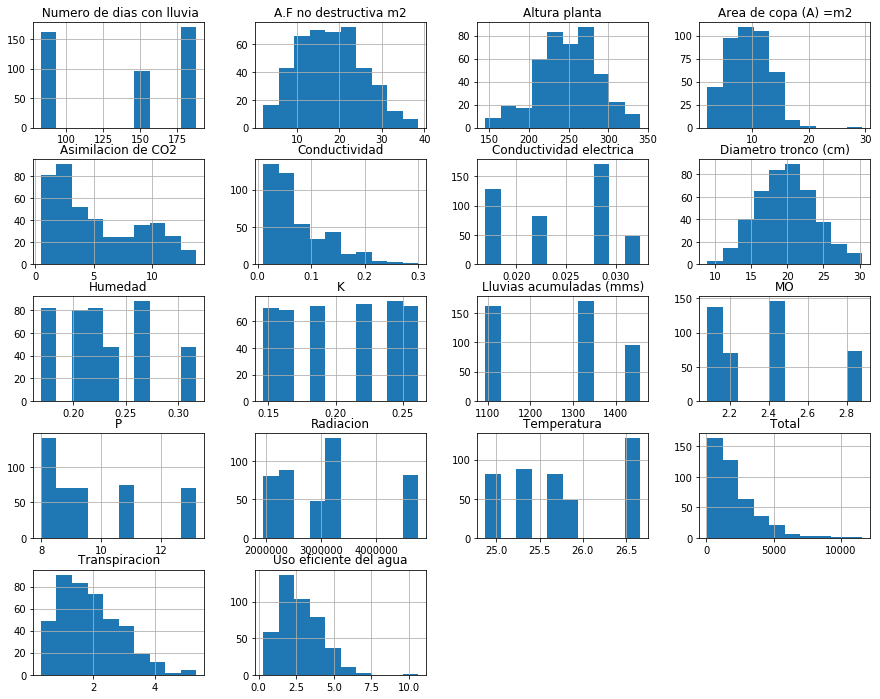

In [8]:
datos.hist(figsize = (15,12))
plt.show()

In [9]:
cols_to_norm = ['Altura planta','Area de copa (A) =m2', 'Diametro tronco (cm)','A.F no destructiva m2','P','Asimilacion de CO2','Uso eficiente del agua','Transpiracion','Conductividad','K','MO','Radiacion','Temperatura','Conductividad electrica','Lluvias acumuladas (mms)','Humedad',' Numero de dias con lluvia','Total']
datos[cols_to_norm] = datos[cols_to_norm].apply(lambda X: (X - X.min()) / (X.max() - X.min()))

In [10]:
datos.head()

,Altura planta,Area de copa (A) =m2,Diametro tronco (cm),A.F no destructiva m2,P,Asimilacion de CO2,Uso eficiente del agua,Transpiracion,Conductividad,K,MO,Radiacion,Temperatura,Conductividad electrica,Lluvias acumuladas (mms),Humedad,Numero de dias con lluvia,Total
0,0.485969,0.072053,0.315053,0.239180,0.063124,0.140079,0.032921,0.677932,0.309640,0.199884,0.0,0.404994,0.980408,0.050663,1.0,0.490981,0.666667,0.081196
1,0.244898,0.118009,0.310385,0.153458,0.063124,0.092633,0.096445,0.204771,0.034404,0.199884,0.0,0.404994,0.980408,0.050663,1.0,0.490981,0.666667,0.042171
2,0.409439,0.187083,0.345391,0.303673,0.063124,0.167191,0.089546,0.381710,0.103213,0.199884,0.0,0.404994,0.980408,0.050663,1.0,0.490981,0.666667,0.018566
3,0.068878,0.023874,0.190198,0.033923,0.063124,0.203341,0.092004,0.449304,0.137618,0.199884,0.0,0.404994,0.980408,0.050663,1.0,0.490981,0.666667,0.153303
4,0.262755,0.140078,0.353559,0.186011,0.063124,0.391619,0.143332,0.576541,0.206426,0.199884,0.0,0.404994,0.980408,0.050663,1.0,0.490981,0.666667,0.046181


In [11]:
# Especificar X y Y
X = datos.values[:,:-1]  #[:,14:18] #[:,3:-1]
Y = datos.values[:,-1]

In [12]:
# hacer validación cruzada
kf = KFold(n_splits=5,random_state=0, shuffle=True)
kf.get_n_splits(X)

5

In [13]:
# para hacer holdout
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

In [14]:

#start = time.time()
#for i in range(1):
    
#mlp = nn.MLPRegressor(solver='adam', hidden_layer_sizes=10, max_iter=100, activation='relu', random_state=1, learning_rate_init=0.025, batch_size='auto', momentum=0.09)
#mlp.fit(X_train, y_train)
#y_pred = mlp.predict(X_test)
#r2 = r2_score(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#mae = mean_absolute_error(y_test, y_pred)
#print("R2: ", r2)
#print("MSE: ", mse)
#print("RMSE: ", np.sqrt(mse))
#print('MAE: ', mae)

#end = time.time()
#print('Total Time: ', end - start)


In [15]:
#CON VALIDACIÓN CRUZADA

R = []
MSE = []   
MAE = []   
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    mlp = nn.MLPRegressor(solver='adam', hidden_layer_sizes=10,  activation='relu', random_state=1, learning_rate_init=0.025, batch_size='auto', momentum=0.09)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print("R2: ", r2)
    print("MSE: ", mse)
    print("RMSE: ", np.sqrt(mse))
    print('MAE: ', mae)
    R.append(r2)
    MSE.append(mse)
    MAE.append(mae)
print("meanR2: ",np.array(R).mean())
print("meanMSE: ",np.array(MSE).mean())
print("meanRMSE: ", np.sqrt(MSE).mean())
print('meanMAE: ',np.array(MAE).mean())


R2:  0.15097421505302633
MSE:  0.025404549072018244
RMSE:  0.1593880455743725
MAE:  0.12069935623853888
R2:  0.08211517183703321
MSE:  0.020303834827072653
RMSE:  0.1424915254570343
MAE:  0.1101358195341346
R2:  0.04010858051797361
MSE:  0.01942404801890915
RMSE:  0.13937018339267962
MAE:  0.11542841017471835
R2:  0.11005477204961733
MSE:  0.02751439392462491
RMSE:  0.16587463315596182
MAE:  0.11634388961142973
R2:  -0.07637602936717003
MSE:  0.01704588972770343
RMSE:  0.1305599085772636
MAE:  0.10557457438822276
meanR2:  0.06137534201809609
meanMSE:  0.02193854311406568
meanRMSE:  0.14753685923146237
meanMAE:  0.11363640998940885


In [16]:
mlp

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=10, learning_rate='constant',
       learning_rate_init=0.025, max_iter=200, momentum=0.09,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
print(mlp.coefs_[0].shape)
mlp.coefs_[0]

(17, 10)


array([[-3.50839906e-04,  1.04233934e-01, -6.24960592e-01,
        -3.35160926e-01, -4.82760998e-01, -4.93972188e-01,
        -4.94732857e-01, -1.53194719e-01, -2.05872933e-01,
         1.44375068e-01],
       [-3.99404641e-04,  5.40412934e-02, -4.38196093e-01,
         2.05249750e-01, -5.94844339e-01,  5.51942957e-02,
        -2.75223238e-01,  3.69450838e-02, -4.38694334e-01,
        -1.67277381e-01],
       [ 1.32068744e-03,  3.36727743e-01, -3.34133775e-01,
         3.11153699e-02,  2.04644882e-01,  2.58378337e-01,
        -5.88913038e-01, -4.47096121e-01, -4.30950959e-01,
         4.84415455e-01],
       [-6.54846320e-03, -1.25716254e-01,  2.73541256e-01,
        -1.18532661e-01,  3.07873696e-02, -2.87823995e-01,
        -2.04301225e-02,  2.31859142e-01, -5.72888225e-01,
         2.42444932e-01],
       [ 6.19528961e-03,  3.65947711e-02, -2.71942800e-01,
         1.22342925e-01, -5.23171582e-01, -3.46058631e-03,
         1.95746210e-01, -7.61150133e-02, -7.13572418e-02,
        -1.

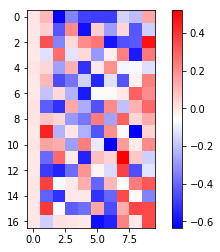

In [18]:
plt.imshow(mlp.coefs_[0], cmap = "bwr")
plt.colorbar()
plt.show()

In [19]:
print(mlp.coefs_[1].shape)
mlp.coefs_[1]

(10, 1)


array([[-0.00278863],
       [-0.26989729],
       [ 0.16630975],
       [-0.4119166 ],
       [-0.20302746],
       [ 0.29292763],
       [-0.2675158 ],
       [ 0.07872094],
       [-0.05833255],
       [ 0.45903406]])

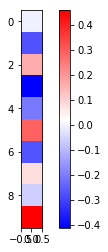

In [20]:
plt.imshow(mlp.coefs_[1], cmap = "bwr")
plt.colorbar()
plt.show()

In [21]:
print(mlp.intercepts_[0].shape)
print(mlp.intercepts_[0])

(10,)
[-0.17219237  0.36024896 -0.07331527 -0.26307312 -0.10204729  0.11822497
 -0.03519321 -0.18276414 -0.52220772  0.01007447]


In [22]:
print(mlp.intercepts_[1].shape)
print(mlp.intercepts_[1])

(1,)
[-0.15122678]


In [23]:
pesos=mlp.coefs_

#Capa de entrada - capa oculta
a=[]
for i in range (6):
    for j in range (10):
        a.append([i+1,j+1,pesos[0][i][j]])
        
Pesos1=pd.DataFrame(a,columns=["Neurona de entrada","Neurona oculta","Peso sináptico"])

# Capa oculta - Capa de salida
b=[]
for i in range(10):
    for j in range(1):
        b.append([i+1,j+1,pesos[1][i][j]])
Pesos2=pd.DataFrame(b,columns=["Neurona oculta","Neurona de salida","Peso sináptico"])

print("Pesos sinápticos entre la capa de entrada y la oculta (neurona 1): ")
print(Pesos1[:10])
print()
print("Pesos sinápticos entre la capa oculta y la capa de salida:")
print(Pesos2[:1])

Pesos sinápticos entre la capa de entrada y la oculta (neurona 1): 
   Neurona de entrada  Neurona oculta  Peso sináptico
0                   1               1       -0.000351
1                   1               2        0.104234
2                   1               3       -0.624961
3                   1               4       -0.335161
4                   1               5       -0.482761
5                   1               6       -0.493972
6                   1               7       -0.494733
7                   1               8       -0.153195
8                   1               9       -0.205873
9                   1              10        0.144375

Pesos sinápticos entre la capa oculta y la capa de salida:
   Neurona oculta  Neurona de salida  Peso sináptico
0               1                  1       -0.002789
